# Laboratory Five - Improving Matches for a Dating Site

In [29]:
import pandas as pd

firstdata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datingData_test.txt', header=None)
firstdata.columns = ['first']
firstdata.head()

,first
0,9916\t2.695935\t1.512111\tsmallDoses
1,38889\t3.356646\t0.324230\tdidntLike
2,39075\t14.677836\t0.793183\tlargeDoses
3,48071\t1.551934\t0.130902\tdidntLike
4,7275\t2.464739\t0.223502\tsmallDoses


In [30]:
import pandas as pd

firstdata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datingData_test.txt', header=None)
firstdata.columns = ['first']
split_data = firstdata['first'].str.split('\t')
data1st = split_data.to_list()
names = ['Number of frequent flyer miles earned per year', 
         'Percentage of time spent playing video games', 
         'Liters of ice cream consumed per week', 'Class']
testdata = pd.DataFrame(data1st, columns=names)
testdata.head()

,Number of frequent flyer miles earned per year,Percentage of time spent playing video games,Liters of ice cream consumed per week,Class
0,9916,2.695935,1.512111,smallDoses
1,38889,3.356646,0.324230,didntLike
2,39075,14.677836,0.793183,largeDoses
3,48071,1.551934,0.130902,didntLike
4,7275,2.464739,0.223502,smallDoses


In [31]:
import pandas as pd

seconddata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datingData_training.txt', header=None)
seconddata.columns = ['first']
seconddata.head()

,first
0,40920\t8.326976\t0.953952\tlargeDoses
1,14488\t7.153469\t1.673904\tsmallDoses
2,26052\t1.441871\t0.805124\tdidntLike
3,75136\t13.147394\t0.428964\tdidntLike
4,38344\t1.669788\t0.134296\tdidntLike


In [32]:
import pandas as pd

seconddata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datingData_training.txt', header=None)
seconddata.columns = ['first']
split_data = seconddata['first'].str.split('\t')
data2nd = split_data.to_list()
names = ['Number of frequent flyer miles earned per year', 
         'Percentage of time spent playing video games', 
         'Liters of ice cream consumed per week', 'Class']
traindata = pd.DataFrame(data2nd, columns=names)
traindata.head()

,Number of frequent flyer miles earned per year,Percentage of time spent playing video games,Liters of ice cream consumed per week,Class
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [33]:
from sklearn import tree
Y = testdata['Class'].astype(str).astype(str)
X1 = testdata['Number of frequent flyer miles earned per year'].astype(str).astype(int)
X2 = testdata['Percentage of time spent playing video games'].astype(str).astype(float)
X3 = [X1,X2]
X = pd.DataFrame(X3)

In [34]:
Y_train = traindata['Class']
X_train = traindata.drop(['Class'], axis = 1)

In [35]:
Y_test = testdata['Class']
X_test = testdata.drop(['Class'], axis = 1)

## Decision Tree Classifier

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

#############################################
# Model fitting and evaluation
#############################################
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

start_time1 = time.time()
index = 0
for depth in maxdepths:
    X_train, Y_train = train_test_split(X_train.T, Y_train, test_size=0.9)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
end_time1 = time.time()

In [54]:
import numpy as np
print("training set Accuracy", np.mean(trainAcc))
print("testing set Accuracy", np.mean(testAcc))

training set F-measure 0.9829411764705883
testing set F-measure 0.9473529411764706


Time spent to predict: 0.0995032787322998


Text(0, 0.5, 'F-measure')

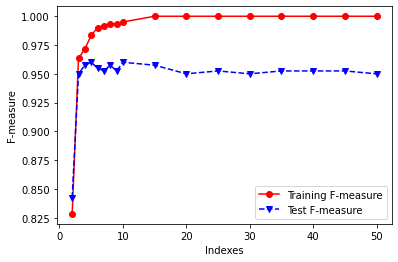

In [56]:
print("Time spent to predict:",end_time1-start_time1)
time1 = end_time1 - start_time1
plt.plot(indexes, trainAcc, 'ro-',indexes, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Indexes')
plt.ylabel('Accuracy')

##  K-Nearest neighbor classifier

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn import tree
from sklearn.metrics import recall_score

######################################
#training and test set creation
######################################


indexes = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainScore2 = [] #recall
testScore2 = [] #recall


start_time2 = time.time()
for indexe in indexes:
    #test_size = 0.1 since using 10% of daata for the test
    clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=3)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainScore2.append(recall_score(Y_train, Y_predTrain, average='micro'))
    testScore2.append(recall_score(Y_test, Y_predTest, average='micro'))
end_time2 = time.time()

training set F-measure 0.855
testing set F-measure 0.805
Time spent to predict: 0.6112220287322998


Text(0, 0.5, 'F-measure')

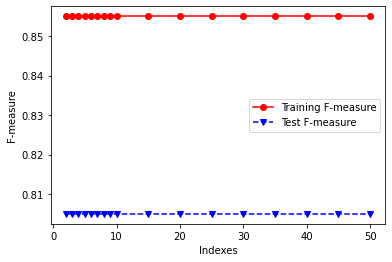

In [43]:
import numpy as np
print("training set F-measure", np.mean(trainScore2))
print("testing set F-measure", np.mean(testScore2))

print("Time spent to predict:",end_time2-start_time2)
time2 = end_time2 - start_time2
plt.plot(indexes, trainScore2, 'ro-',indexes, testScore2, 'bv--')
plt.legend(['Training F-measure', 'Test F-measure'])
plt.xlabel('Indexes')
plt.ylabel('F-measure')

## Linear Classifiers

Text(0, 0.5, 'Accuracy')

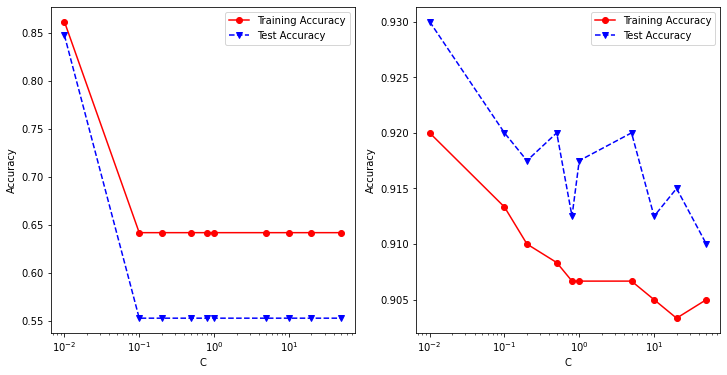

In [39]:
from sklearn import linear_model
from sklearn.svm import SVC
import time

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

start_time3 = time.time()
for param in C:
    clf = linear_model.LogisticRegression(C=param)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
end_time3 = time.time()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

## Nonlinear Support Vector Machine

Text(0, 0.5, 'Accuracy')

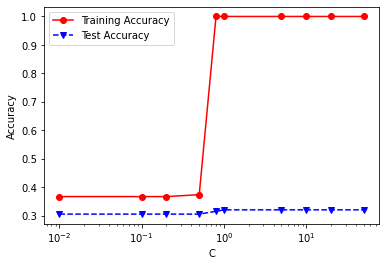

In [40]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

## Ensemble Methods

[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'AdaBoost')]

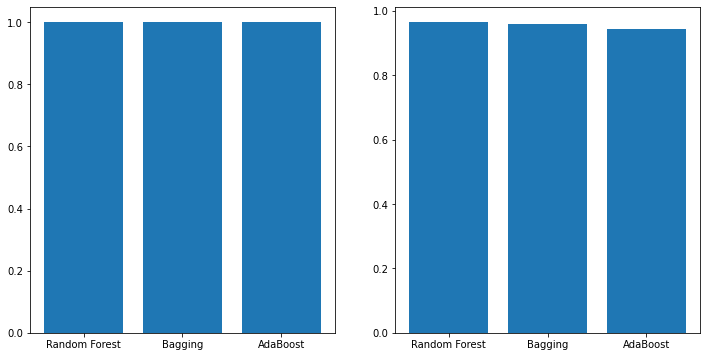

In [41]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)